In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load datasets
userbase = pd.read_csv('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/Netflix Userbase.csv')
clickstream = pd.read_csv('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/WatchLog Data/All_Clickstream.csv')
devices = pd.read_csv('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/WatchLog Data/All_Devices.csv')
profiles = pd.read_csv('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/WatchLog Data/All_Profiles.csv')
search_history = pd.read_csv('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/WatchLog Data/All_SearchHistory.csv')
viewing_activity = pd.read_csv('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/WatchLog Data/All_ViewingActivity.csv')
with open('/Users/jamesmoy/Desktop/Analytics Portfolio/Netflix User Base Data/netflix_titles.csv', encoding='utf-8', errors='replace') as f:
    titles = pd.read_csv(f)


In [6]:
# View the first few rows of the data
print(userbase.head())
print(clickstream.head())
print(devices.head())

# Check for missing values
print(userbase.isnull().sum())

# Check data types
print(userbase.info())


   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
  Profile Name    Source Navigation Level Referrer Url Webpage Url  \
0       User 4  Source 0     signupPrompt          NaN         NaN   
1       User 4  Source 0     browseTitles  

In [7]:
from datetime import datetime

# Convert dates to datetime
userbase['Last Payment Date'] = pd.to_datetime(userbase['Last Payment Date'], errors='coerce')

# Define churned users (example: users inactive for 30+ days from the current date)
today = datetime.today()
userbase['Days Since Last Payment'] = (today - userbase['Last Payment Date']).dt.days
userbase['Churned'] = userbase['Days Since Last Payment'] > 30

# Check churned user counts
print(userbase['Churned'].value_counts())


Churned
True    2500
Name: count, dtype: int64


/var/folders/w6/vkcmr8l91_12vz93c0c46mtm0000gn/T/ipykernel_69940/1330014671.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  userbase['Last Payment Date'] = pd.to_datetime(userbase['Last Payment Date'], errors='coerce')


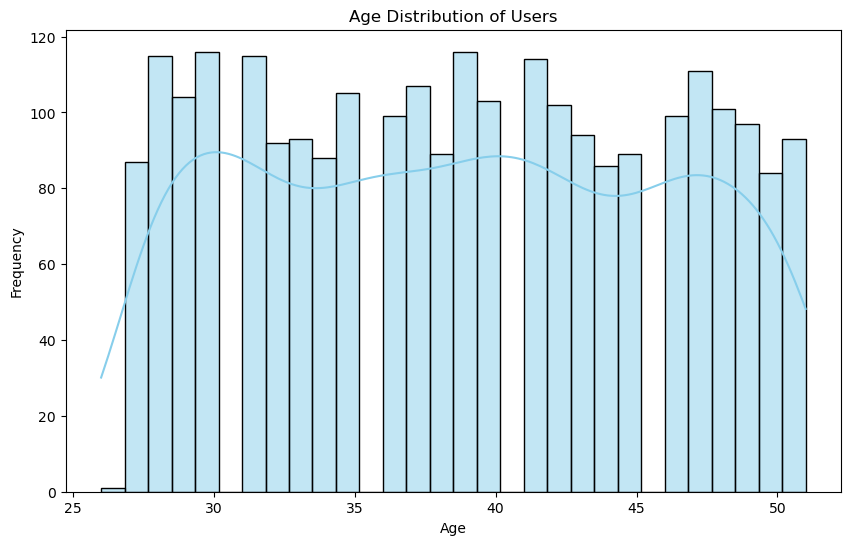

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(userbase['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


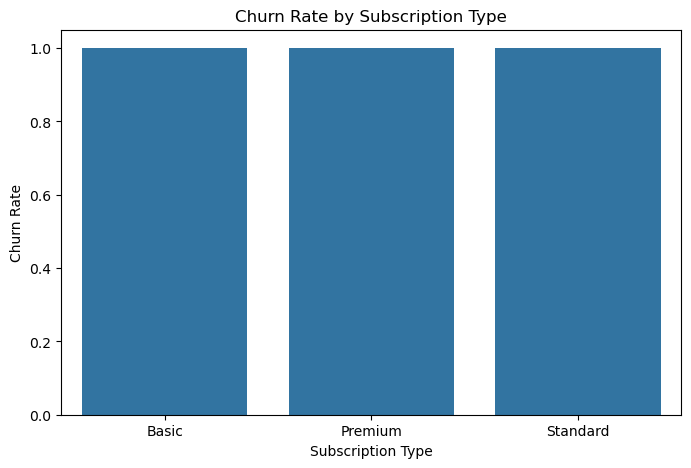

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=userbase, x='Subscription Type', y='Churned', estimator=lambda x: sum(x)/len(x))
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.show()


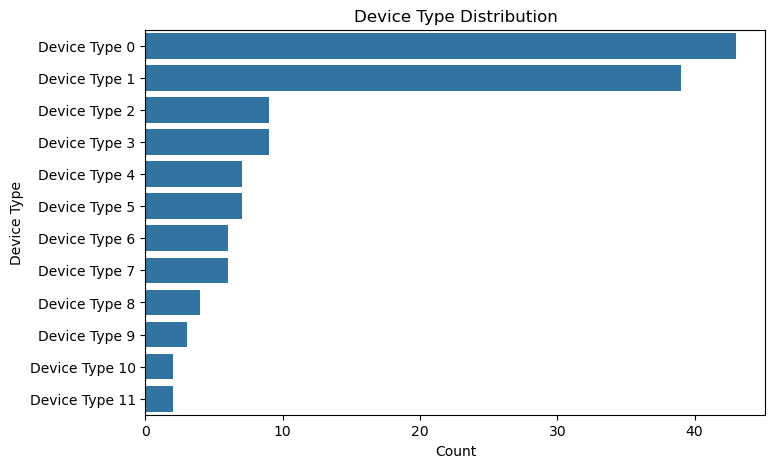

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=devices, y='Device Type', order=devices['Device Type'].value_counts().index)
plt.title('Device Type Distribution')
plt.xlabel('Count')
plt.ylabel('Device Type')
plt.show()


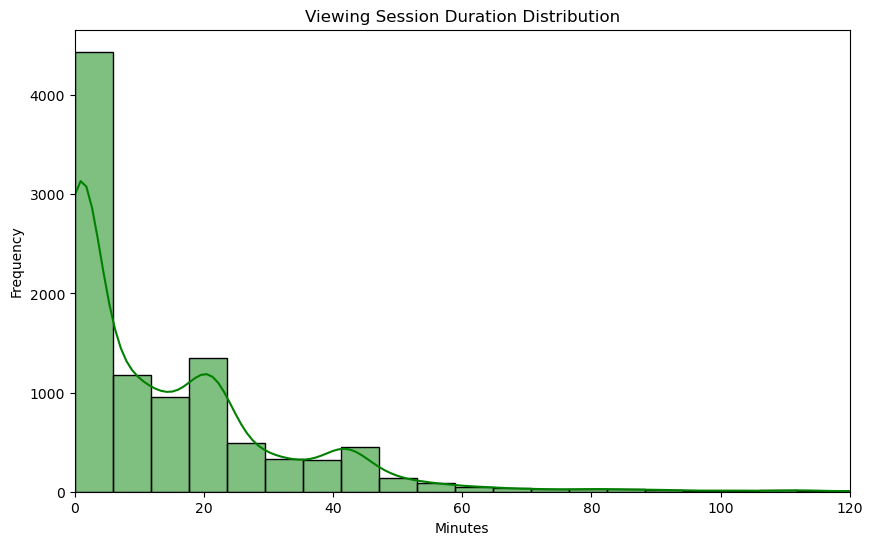

In [11]:
# Convert duration to minutes
viewing_activity['Duration'] = pd.to_timedelta(viewing_activity['Duration'], errors='coerce')
viewing_activity['Duration (Minutes)'] = viewing_activity['Duration'].dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.histplot(viewing_activity['Duration (Minutes)'], kde=True, bins=30, color='green')
plt.title('Viewing Session Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.xlim(0, 120)
plt.show()


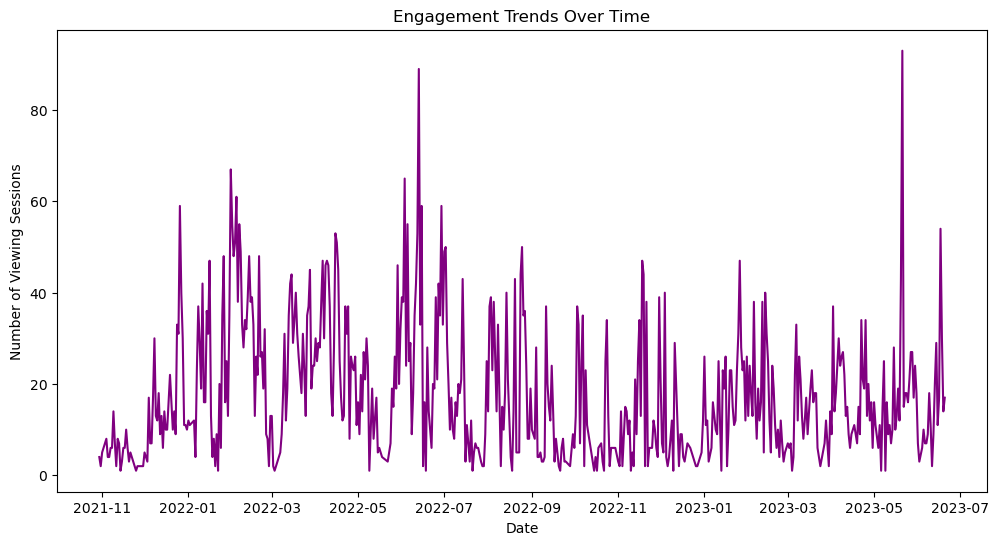

In [12]:
# Convert Start Time to datetime
viewing_activity['Start Time'] = pd.to_datetime(viewing_activity['Start Time'], errors='coerce')
viewing_activity['Date'] = viewing_activity['Start Time'].dt.date

engagement = viewing_activity.groupby('Date').size()

plt.figure(figsize=(12, 6))
engagement.plot(kind='line', color='purple')
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Viewing Sessions')
plt.show()


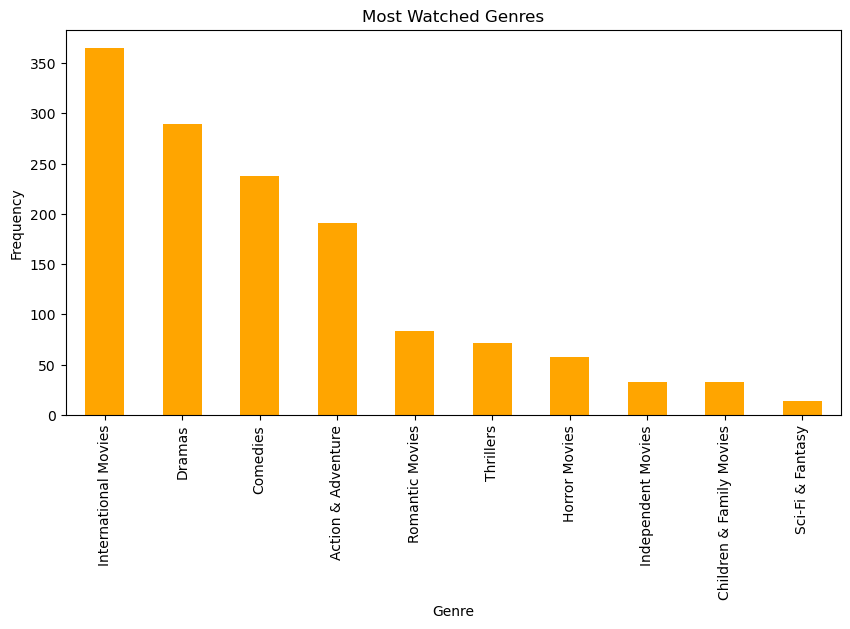

In [13]:
# Merge viewing_activity with titles on Title
viewing_activity = viewing_activity.merge(titles[['title', 'listed_in']], left_on='Title', right_on='title', how='left')

# Count most watched genres
genres = viewing_activity['listed_in'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 5))
genres.plot(kind='bar', color='orange')
plt.title('Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()
